In [ ]:
!pip install -q datasets transformers
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -al "/content/drive/MyDrive/Image Classification For Food Recognition/"

total 1551372
-rw------- 1 root root 1588604321 Jan 17 04:57 Dataset.zip


In [ ]:
!unzip "/content/drive/MyDrive/Image Classification For Food Recognition/Dataset.zip" -d /tmp/foodimg

In [ ]:
!pip install datasets
!pip install transformers[torch]
!pip install accelerate>=0.20.1

In [ ]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split

ds = load_dataset("imagefolder", data_dir="/tmp/foodimg/Food Classification")
ds_train = ds['train']


Resolving data files:   0%|          | 0/6271 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:

train_ds, test_ds = ds["train"].train_test_split(test_size=0.15, shuffle=True, seed=42)

In [ ]:
train_set = train_ds
test_set = test_ds

In [ ]:
print("Number of rows in train set:", len(train_set))
print("Number of rows in test set:", len(test_set))

Number of rows in train set: 5
Number of rows in test set: 4


In [ ]:
ds.push_to_hub("ksuyash/food-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/1568 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

Map:   0%|          | 0/1567 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

Map:   0%|          | 0/1567 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

Map:   0%|          | 0/1567 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/841 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ksuyash/food-dataset/commit/d82881b792f70b6f4ac8843f72574f8ee992fdb9', commit_message='Upload dataset', commit_description='', oid='d82881b792f70b6f4ac8843f72574f8ee992fdb9', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
ex = ds['train'][686]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x900>,
 'label': 2}

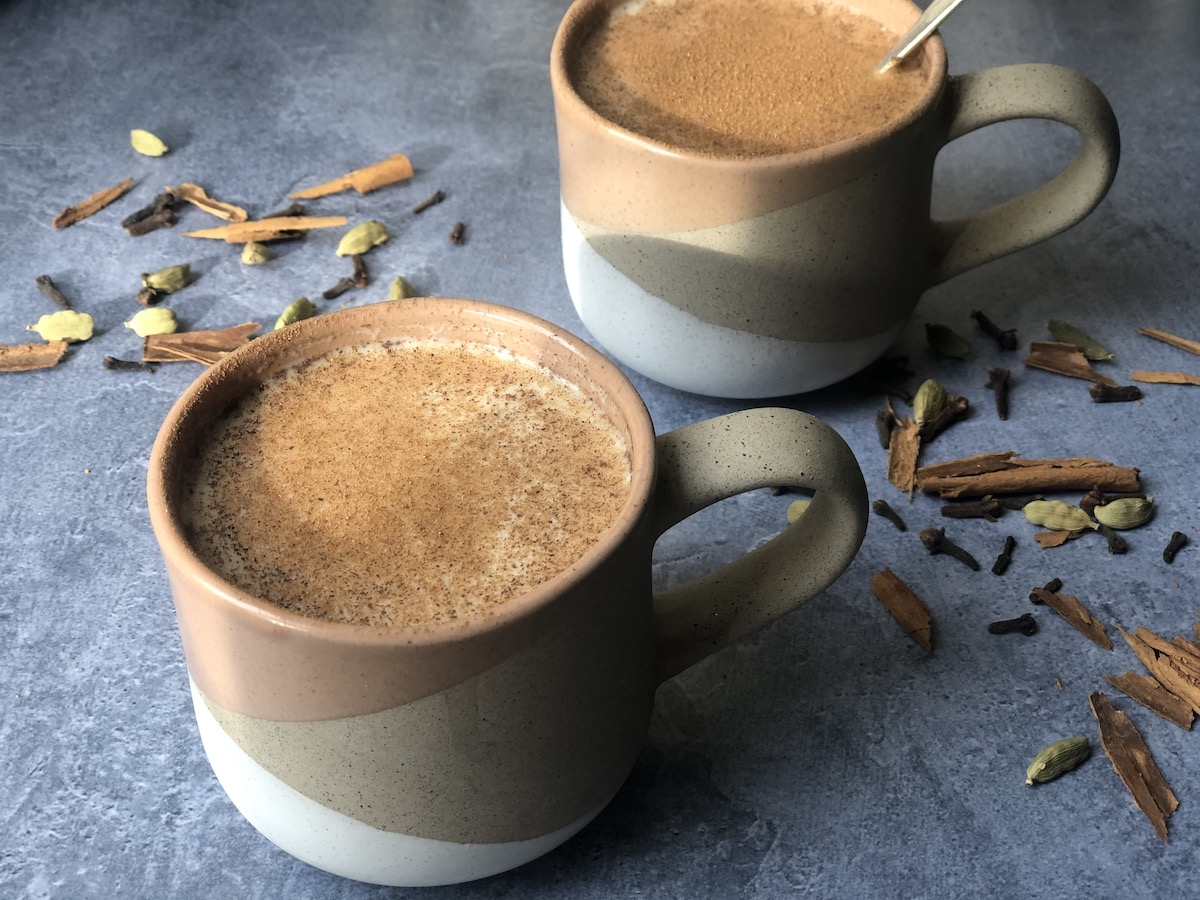

In [ ]:
image = ex['image']
image

In [ ]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa'], id=None)

In [ ]:
labels.int2str(ex['label'])

'chai'

In [ ]:
from datasets import load_metric

metric = load_metric("accuracy")

<ipython-input-17-350fcae91df9>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 6269
    })
})

In [ ]:
labels = ds["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

Prepocessing the Data

In [ ]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)


In [ ]:
normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

In [ ]:
train_transforms = Compose(
        [
            RandomResizedCrop(feature_extractor.size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

In [ ]:
val_transforms = Compose(
    [
        Resize((feature_extractor.size['height'], feature_extractor.size['width'])),
        CenterCrop((feature_extractor.size['height'], feature_extractor.size['width'])),
        ToTensor(),
        normalize,
    ]
)

In [ ]:
def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

In [ ]:
def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

In [ ]:
# spliting training into training + validation
train_ds = ds['train']
val_ds = ds['train']

In [ ]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

In [ ]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3456x3456>,
 'label': 0,
 'pixel_values': tensor([[[ 0.0196,  0.0275,  0.0353,  ...,  0.0588,  0.0667,  0.0745],
          [-0.0039,  0.0039,  0.0039,  ...,  0.0588,  0.0667,  0.0667],
          [-0.0196, -0.0196, -0.0196,  ...,  0.0588,  0.0588,  0.0588],
          ...,
          [ 0.5216,  0.5373,  0.5373,  ...,  0.5686,  0.5765,  0.6235],
          [ 0.5373,  0.5294,  0.5294,  ...,  0.6314,  0.6235,  0.6392],
          [ 0.5216,  0.5059,  0.5216,  ...,  0.6235,  0.5922,  0.5608]],
 
         [[ 0.1294,  0.1373,  0.1451,  ...,  0.1137,  0.1137,  0.1216],
          [ 0.1059,  0.1059,  0.1137,  ...,  0.1137,  0.1137,  0.1137],
          [ 0.0824,  0.0824,  0.0824,  ...,  0.1059,  0.1059,  0.1059],
          ...,
          [ 0.5451,  0.5608,  0.5765,  ...,  0.5765,  0.6000,  0.6549],
          [ 0.5686,  0.5608,  0.5608,  ...,  0.6706,  0.6627,  0.6784],
          [ 0.5373,  0.5294,  0.5373,  ...,  0.6627,  0.6314,  0.5922

Training the model

In [ ]:
!pip install accelerate>=0.20.1


In [ ]:
!pip show accelerate

Name: accelerate
Version: 0.26.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: sylvain@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 


In [ ]:
!pip install transformers[torch]


In [ ]:
from transformers import ViTForImageClassification

# Assuming you have a list of labels named 'labels'
num_labels = len(labels)
id_label_mapping = {str(i): c for i, c in enumerate(labels)}

model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=num_labels,
    id2label=id_label_mapping,
    label2id={c: str(i) for i, c in id_label_mapping.items()}
)


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='finetuned-indian-food',
    per_device_train_batch_size=16,
    evaluation_strategy="steps",
    num_train_epochs=4,
    fp16=True,
    save_steps=100,
    eval_steps=100,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=True,
    report_to='tensorboard',
    load_best_model_at_end=True,
    hub_strategy="end"
)


In [ ]:
import numpy as np

# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [ ]:
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [ ]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

events.out.tfevents.1705609476.f3e0d212487b.522.0:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

***** train metrics *****
  epoch                    =          4.0
  total_flos               = 1810027866GF
  train_loss               =       0.2857
  train_runtime            =   1:03:38.16
  train_samples_per_second =        6.568
  train_steps_per_second   =        0.411


In [ ]:
metrics = trainer.evaluate()
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9981
  eval_loss               =     0.0144
  eval_runtime            = 0:04:00.90
  eval_samples_per_second =     26.022
  eval_steps_per_second   =      3.254


In [ ]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'indian_food_images',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

events.out.tfevents.1705613565.f3e0d212487b.522.1:   0%|          | 0.00/411 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("rajistics/finetuned-indian-food")
model = AutoModelForImageClassification.from_pretrained("rajistics/finetuned-indian-food")

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

inference

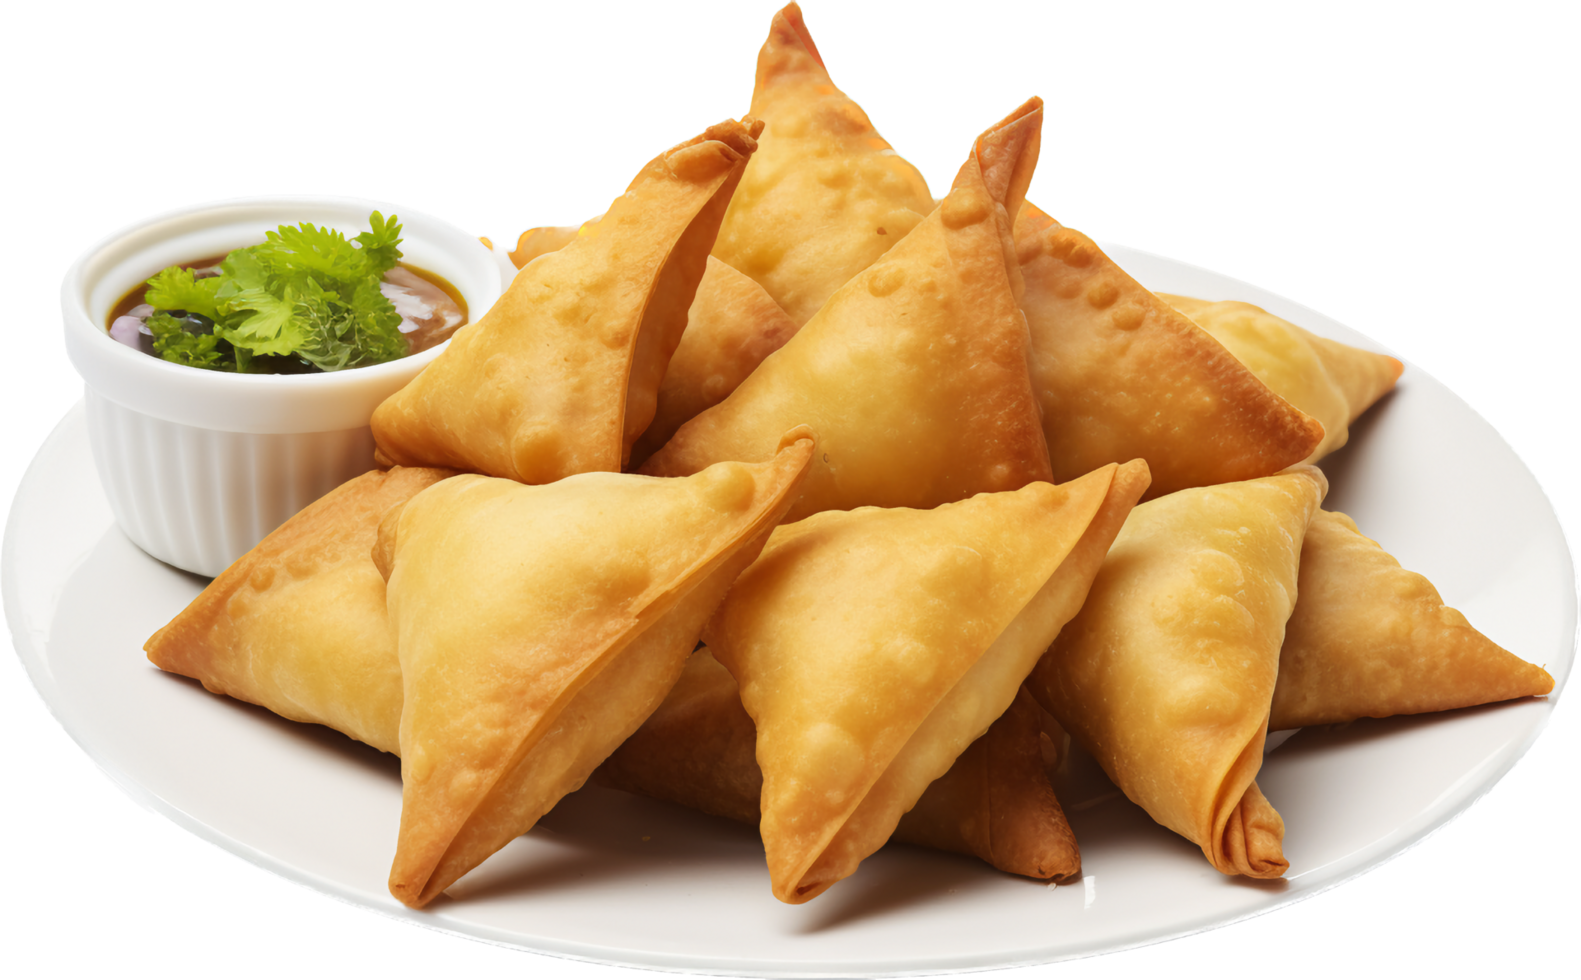

In [ ]:
from PIL import Image
import requests
#random image
url = 'https://cdn.discordapp.com/attachments/1197658527955697855/1197658765470740480/samosa.webp?ex=65bc11a5&is=65a99ca5&hm=a81663531bbed23cff81d939feda4b48748d20155ea836f861f77f98820ce824&'
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

repo_name = "ksuyash/finetuned-indian-food"

feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

preprocessor_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

In [ ]:
# prepare image for the model
encoding = feature_extractor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**encoding)
  logits = outputs.logits

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: samosa


(optional) using pipeline

In [ ]:
from transformers import pipeline
pipe = pipeline("image-classification", "ksuyash/finetuned-indian-food")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
url = 'https://cdn.discordapp.com/attachments/1197658527955697855/1197658765470740480/samosa.webp?ex=65bc11a5&is=65a99ca5&hm=a81663531bbed23cff81d939feda4b48748d20155ea836f861f77f98820ce824&'
image = Image.open(requests.get(url, stream=True).raw)

pipe(image)

[{'score': 0.9917069673538208, 'label': 'samosa'},
 {'score': 0.0010072989389300346, 'label': 'chole_bhature'},
 {'score': 0.0007078398484736681, 'label': 'pakode'},
 {'score': 0.0006545955548062921, 'label': 'kaathi_rolls'},
 {'score': 0.0004711290239356458, 'label': 'momos'}]

In [ ]:
pipe = pipeline("image-classification",
                model=model,
                feature_extractor=feature_extractor)

In [ ]:
pipe(image)

[{'score': 0.9917069673538208, 'label': 'samosa'},
 {'score': 0.0010072989389300346, 'label': 'chole_bhature'},
 {'score': 0.0007078398484736681, 'label': 'pakode'},
 {'score': 0.0006545955548062921, 'label': 'kaathi_rolls'},
 {'score': 0.0004711290239356458, 'label': 'momos'}]